<a href="https://colab.research.google.com/github/moniquecardoso24/Projetos-/blob/main/ifood_dev_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iFood Dev Week

Saiba mais sobre essa semana incrível no Artigo [Desvendando a iFood Dev Week](https://www.dio.me/articles/desvendando-a-ifood-dev-week).

## Dia 1: [Conheça o Google Colab e o Projeto Desta Dev Week](https://www.youtube.com/live/59XwC5e8U1k?feature=share)

Vamos mergulhar no Google Colab, aprendendo como ele pode ser usado para automatizar tarefas cotidianas, principalmente através da manipulação de planilhas. Além disso, você aprenderá na prática o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [ ]:
"""
Este código baixa um arquivo CSV de feedbacks do Google Drive e carrega os dados em um DataFrame pandas.

O arquivo é identificado por um ID único ('file_id'), que é extraído da URL do arquivo no Google Drive.
A URL do arquivo no Google Drive tem o seguinte formato:
https://drive.google.com/file/d/FILE_ID/view?usp=sharing
"""
# adicionou mais notas da planilha e foi atualizada por isso o nps aumentou de 40 para 57.

# TODO: Baixar o arquivo CSV do Google Drive e carregar seus dados em um DataFrame pandas.

import gdown
import pandas as pd

# Baixar a planilha
file_id = '1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi' #id url do arquivo do drive
gdown.download(f'http://drive.google.com/uc?id={file_id}', 'feedbacks.csv') #url para baixar o arquivo

#Ler a planilha
dados = pd.read_csv('/content/feedbacks.csv', delimiter=';')

Downloading...
From: http://drive.google.com/uc?id=1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi
To: /content/feedbacks.csv
100%|██████████| 365/365 [00:00<00:00, 1.06MB/s]


In [ ]:
"""
Versão 1: Paradigma Imperativo.

Este script lê um arquivo CSV contendo feedback de usuários, no qual cada feedback tem uma nota associada.
O NPS é calculado como a diferença entre o percentual de promotores (nota >= 9) e detratores (nota <= 6), multiplicada por 100.
A implementação é realizada de uma maneira imperativa, onde os comandos são executados sequencialmente.
"""

notas = dados['nota']

detratores = 0
promotores = 0

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1

nps = (promotores - detratores) / len(notas) * 100

print(nps)

37.5


In [ ]:
"""
Versão 2: Paradigma Funcional.

Este código segue uma abordagem funcional para calcular o NPS a partir dos dados de feedback.
A função "calcular_nps" é definida para encapsular a lógica do cálculo do NPS. Esta versão apresenta
uma separação de responsabilidades mais clara do que a versão imperativa, além de melhorias de código pontuais.
"""
#outra mananeira de fazer sem ser pelo if e elif, utilizando apply e lambda. - Apply - aplicar função lambda
# variável da função - nota em que nota são menores ou iguais a 6

# indexação boelada no pandas - filtra as notas maiores ou iguais a 9.
# condição boelada >=9

def calcular_nps(notas):
  detratores = notas.apply(lambda nota: nota <= 6).sum() # aplicar uma função lambda de filtro para pegar notas menores ou iguais a 6, sum=soma
  promotores = notas[notas >= 9].count() # contar notas maiores que nome

  return (promotores - detratores) / len(notas) * 100


notas = dados['nota']

nps = calcular_nps(notas)

print(nps)

37.5


In [ ]:
"""
Versão 3: Paradigma Orientado a Objetos (POO).

Este script adota uma abordagem Orientada a Objetos (OO) para calcular o NPS a partir de feedback de usuários.
Duas classes são definidas, onde:
- Feedback representa um único feedback de usuário;
- AnalisadorFeedback é usado para calcular o NPS a partir de uma lista de Feedbacks.
A POO fornece uma abstração mais clara dos dados e comportamentos envolvidos no cálculo do NPS.
Desta forma, nossa solução estará preparada para as evoluções do nosso projeto.
"""

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    # Por ser uma list do Python, aplicamos o conceito de "list comprehension" para filtrar nossos Feedbacks. # soma 1 para cada feedback se ele for menor ou igual a 6
    detratores = sum(1 for feedback in self.feedbacks if feedback.nota <= 6)
    promotores = sum(1 for feedback in self.feedbacks if feedback.nota >= 9)

    return (promotores - detratores) / len(self.feedbacks) * 100


# feedbacks = [Feedback(linha['nota'], linha['comentario'])  for i, linha in dados.iterrows()] ou pode ser feito de outra maneira

# função lambda, dentro do escopo da função gostaria de lidar com as linha. Com base na linha tem o feedback. O eixo das linhas=1.
feedbacks = dados.apply(lambda linha: Feedback(linha['nota'], linha['comentario']), axis =1)

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()

print(nps)

37.5


## Dia 2: Desvendando o Poder dos Seus Dados com Python

No segundo dia, vamos conectar nosso Google Colab ao Google Drive, extrair dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, criaremos gráficos para visualizar e compreender o nível de satisfação dos nossos usuários.

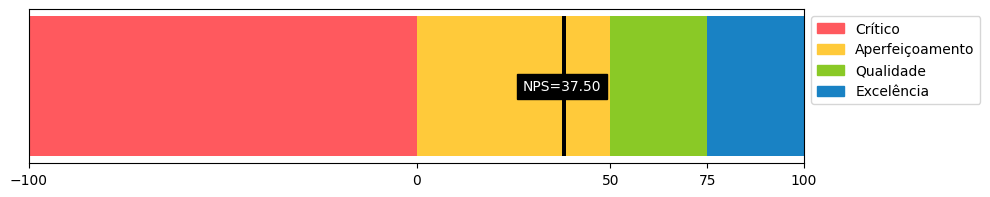

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4'] # vermelho, amarelo, verde e azul


# TODO: Criar um gráfico usando "matplotlib" para visualizar o NPS que calculamos no Dia 1!
def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(10,2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  ax.barh([0], width=1 , left= nps, color='black')
  ax.set_yticks([]) # remover os valores do eixo y
  ax.set_xlim(-100,100) # estabelecer limites do -100 a 100
  ax.set_xticks(NPS_VALORES)  # só os valores do nps_valores

  plt.text(nps, 0, f'NPS={nps:.2f}',ha='center', va='center', color='white', bbox=dict(facecolor='black')) # x=nps e y=0, nps:.2f(2 dígitos),
# ha - alinhamento horizontal - centro
# bbox-caixinha ao redor do número, facecolor

  patches =[mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1)) # patche criado acima - bbox_to_anchor

  plt.show()

criar_grafico_nps(nps)


## Dia 3: Decifrando Sentimentos com Inteligência Artificial (IA)

No último dia, vamos utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa nossos dados quantitativos.

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Documentação Oficial da API OpenAI: https://platform.openai.com/docs/api-reference/introduction
# Informações sobre o Período Gratuito: https://help.openai.com/en/articles/4936830

# Para gerar uma API Key:
# 1. Crie uma conta na OpenAI
# 2. Acesse a seção "API Keys"
# 3. Clique em "Create API Key"
# Link direto: https://platform.openai.com/account/api-keys

# Substitua o texto "TODO" por sua API Key da OpenAI, ela será salva como uma variável de ambiente.
openai_api_key = "TODO"

In [ ]:
# TODO: Integrar com o ChatGPT e usá-lo como um modelo para análise de sentimentos dos nossos comentários.
# Seguem alguns links úteis:
# 1. Endpoint que vamos consumir: https://platform.openai.com/docs/api-reference/chat/create
# 2. Collection Postman da OpenAI: https://www.postman.com/devrel/workspace/openai/documentation/13183464-90abb798-cb85-43cb-ba3a-ae7941e968da

#biblioteca do chatGPT
import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):
  comentarios_formatados= "\n".join([f"- Nota{feedback.nota}! {feedback.comentario}"for feedback in feedbacks])
  prompt= f"""
           Sintetize uma analise geral sobre os seguintes comentários:
           {comentarios_formatados}"""

  respostaAPI = openai.ChatCompletion.create(
      model ="gpt-3.5-turbo",
      max_tokens=20,
      messages=[
      {
          "role": "system",
          "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
      },

      {
          "role": "user",
          "content": f"Analise os seguintes comentários:{feedbacks[0].comentario}"
      }
    ]
  )
  return respostaAPI.choices[0].message.content

insights = analisar_sentimentos(feedbacks)
print(insights)